# Problem statement:
This dataset has total 5 columns and 23688 rows. Our task is to analyze the dataset and predict the expected covid cases of by developing a Timeseries model.

In [56]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [2]:
covid = pd.read_csv('aggregate_covid_country.csv')
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [3]:
covid.shape

(23688, 5)

In [4]:
covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
covid.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [6]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [7]:
covid.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

In [8]:
datewise = covid.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [11]:
print("Basic Information")
print("Total number of Confirmed cases around the world", datewise["Confirmed"].iloc[-1])
print("Total number of Recoverd cases around the world", datewise["Recovered"].iloc[-1])
print("Total number of Deaths around the world", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world", datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Closed cases around the world", datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 5589626
Total number of Recoverd cases around the world 2286956
Total number of Deaths around the world 350453
Total number of Active cases around the world 2952217
Total number of Closed cases around the world 2637409


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

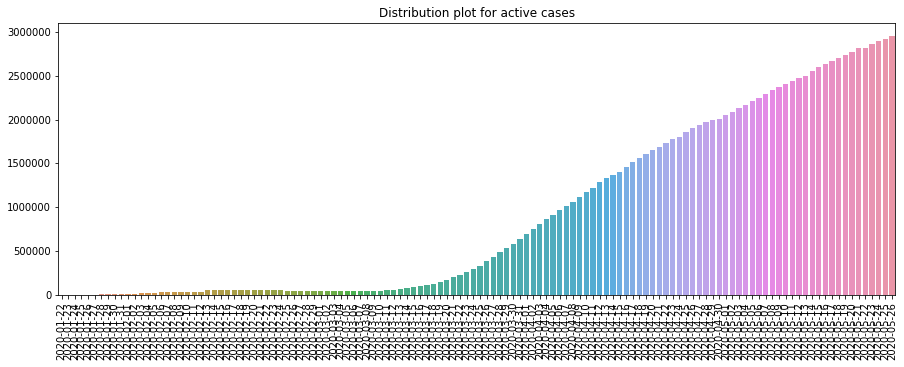

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

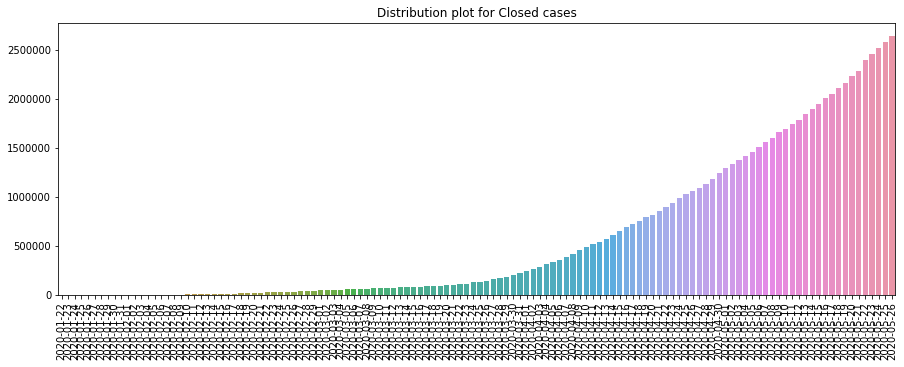

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weekly progress of diffrent types of cases  ')

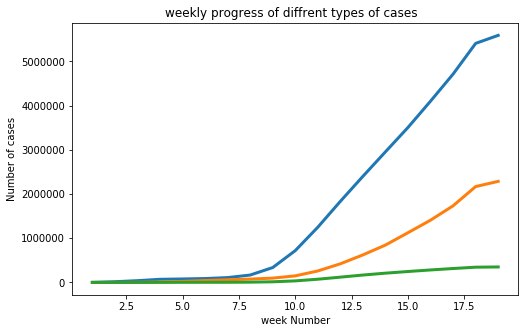

In [19]:
datewise["weekofyear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered =[]
weekwise_deaths = []
w = 1
for i in list(datewise['weekofyear'].unique()):
    weekwise_confirmed.append(datewise[datewise["weekofyear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["weekofyear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["weekofyear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("week Number")
plt.ylabel("Number of cases")
plt.title("weekly progress of diffrent types of cases  ")
    

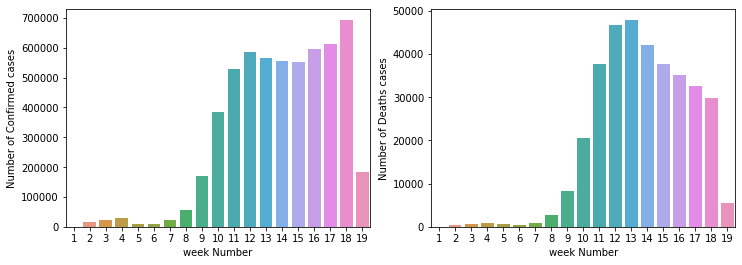

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x = week_num, y = pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week Number")
ax2.set_xlabel("week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
plt.show()

Average increse in number of confirmed cases everyday 44358.0
Average increse in number of recovered cases everyday 18150.0
Average increse in number of deaths cases everyday 2781.0


(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560., 737577.]),
 <a list of 9 Text xticklabel objects>)

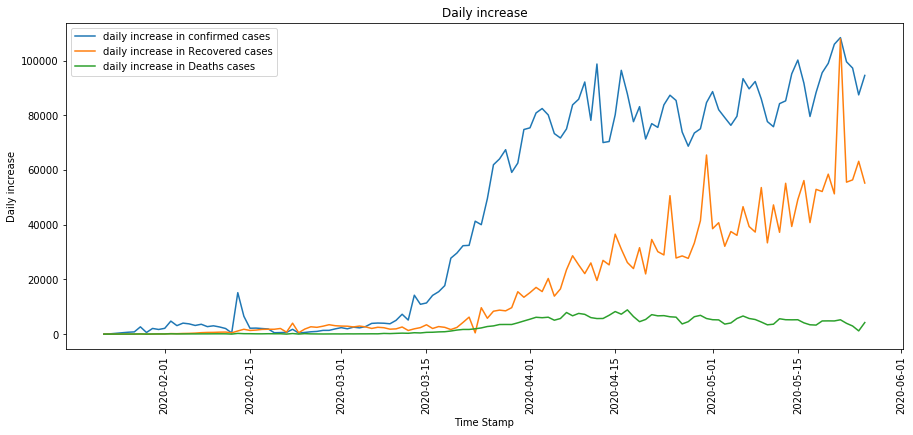

In [26]:
print("Average increse in number of confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increse in number of recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increse in number of deaths cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="daily increase in confirmed cases")
plt.plot(datewise["Recovered"].diff().fillna(0),label="daily increase in Recovered cases")
plt.plot(datewise["Deaths"].diff().fillna(0),label="daily increase in Deaths cases")
plt.xlabel("Time Stamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation =90)

In [31]:
#Country wise analysis
#Calculating country wise mortality rate

countrywise = covid[covid["Date"] == covid["Date"].max()].groupby(["Country"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise['Deaths']/countrywise['Recovered'])*100
countrywise["Recovered"] = (countrywise['Recovered']/countrywise['Confirmed'])*100

Text(0.5, 1.0, 'Top 15 Countries as per number of death cases ')

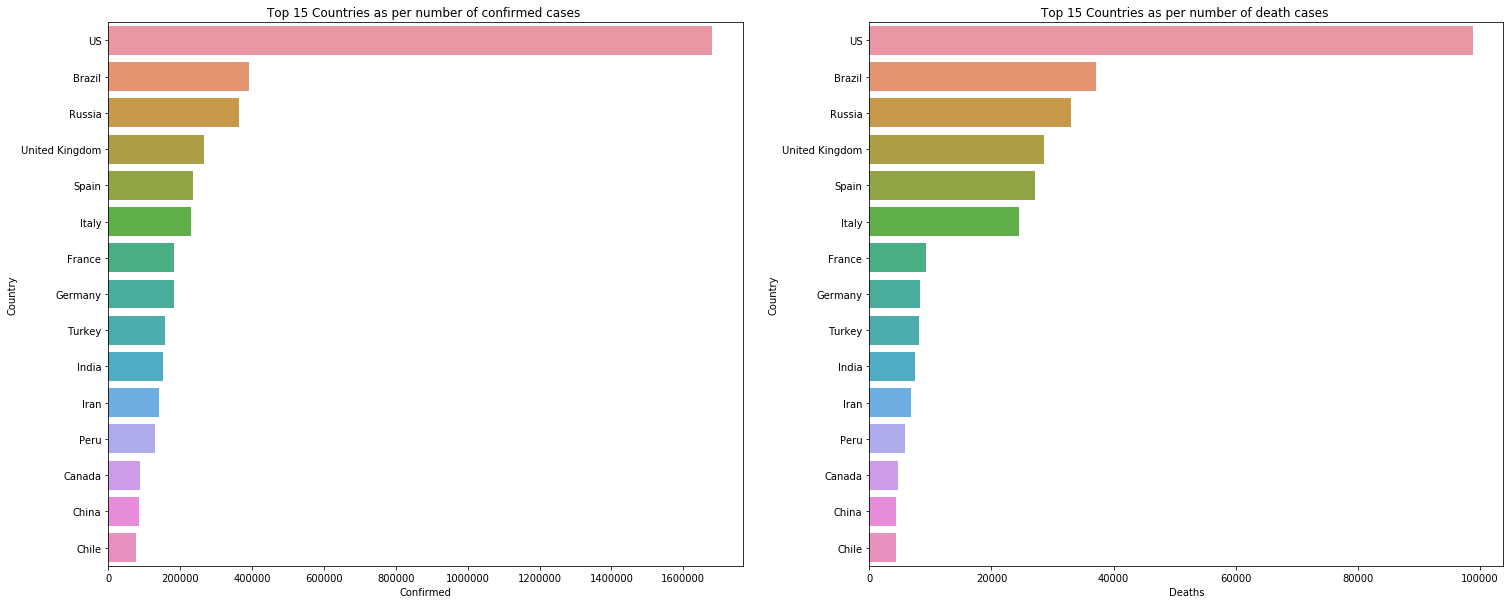

In [36]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(['Confirmed'],ascending=False).head(15)
top_15deaths = countrywise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top_15confirmed['Confirmed'],y =top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 Countries as per number of confirmed cases ")
sns.barplot(x=top_15deaths['Deaths'],y =top_15confirmed.index,ax=ax2)
ax2.set_title("Top 15 Countries as per number of death cases ")

In [37]:
#Data analysis for india
india_data = covid[covid["Country"]=="India"]
datewise_india = india_data.groupby(["Date"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])


Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total Active Cases 82172
Total Closed Cases 68621


Text(0.5, 1.0, 'weekly progress of diffrent types of cases  ')

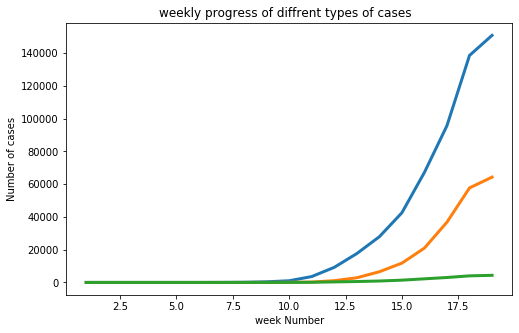

In [38]:
datewise_india["weekofyear"] = datewise_india.index.weekofyear
week_num_india = []
weekwise_confirmed_india = []
weekwise_recovered_india =[]
weekwise_deaths_india = []
w = 1
for i in list(datewise_india['weekofyear'].unique()):
    weekwise_confirmed_india.append(datewise_india[datewise_india["weekofyear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered_india.append(datewise_india[datewise_india["weekofyear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths_india.append(datewise_india[datewise_india["weekofyear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,weekwise_confirmed_india,linewidth=3)
plt.plot(week_num_india,weekwise_recovered_india,linewidth=3)
plt.plot(week_num_india,weekwise_deaths_india,linewidth=3)
plt.xlabel("week Number")
plt.ylabel("Number of cases")
plt.title("weekly progress of diffrent types of cases  ")
    

In [45]:
max_ind =datewise_india['Confirmed'].max()
china_data = covid[covid["Country"]=="Mainland China"]
Italy_data = covid[covid["Country"]=="Italy"]
US_data = covid[covid["Country"]=="US"]
spain_data = covid[covid["Country"]=="Spain"]
datewise_china = china_data.groupby(["Date"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_Italy = Italy_data.groupby(["Date"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_US = US_data.groupby(["Date"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_spain = spain_data.groupby(["Date"]).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print("it took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in india to reach",max_ind,"Confirmed cases")
print("it took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases")
print("it took",datewise_US[(datewise_US["Confirmed"]>0) &(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases")
print("it took",datewise_spain[(datewise_spain["Confirmed"]>0 )&(datewise_spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases")
print("it took",datewise_china[(datewise_china["Confirmed"]>0) & (datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases")

it took 118 days in india to reach 150793 Confirmed cases
it took 71 days in Italy to reach number of Confirmed cases
it took 68 days in US to reach number of Confirmed cases
it took 68 days in Spain to reach number of Confirmed cases
it took 0 days in China to reach number of Confirmed cases


In [46]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
model_scores=[]


# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the number of covid cases which can be increase exponetially. This scenario is a classic example of Time Series Analysis.

We are provided with 23688 rows of the labeled dataset tagged with the output column “cases” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

SVR()

Holt()

In [48]:
lin_reg = LinearRegression(normalize = True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon = 0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [53]:
new_date = []
new_prediction_lr =[]
new_prediction_svm = []
for i in range (1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
    
pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)


,Dates,LR,SVR
0,2020-05-27,3992291,6375101
1,2020-05-28,4032855,6625486
2,2020-05-29,4073419,6883882
3,2020-05-30,4113983,7150480
4,2020-05-31,4154547,7425474
5,2020-06-01,4195111,7709061
6,2020-06-02,4235675,8001441
7,2020-06-03,4276239,8302816
8,2020-06-04,4316803,8613393
9,2020-06-05,4357367,8933380


# Splitting Data:
we split our data into a test set and train set. which helps to better train the model and test its performance. test_size=0.85 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us model_train and Valid 

In [54]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]


In [57]:
holt = Holt(np.array(model_train["Confirmed"])).fit(smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred['Holt'] = holt.forecast(len(valid))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [75]:
holt_new_date=[]
holt_new_predictions =[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days = i))
    holt_new_predictions.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Predictions "] = holt_new_predictions    
model_predictions.head(16)
    

,Dates,LR,SVR,Holts Linear Model Predictions
0,2020-05-27,3992291,6375101,5522024
1,2020-05-28,4032855,6625486,5605840
2,2020-05-29,4073419,6883882,5689655
3,2020-05-30,4113983,7150480,5773470
4,2020-05-31,4154547,7425474,5857286
5,2020-06-01,4195111,7709061,5941101
6,2020-06-02,4235675,8001441,6024916
7,2020-06-03,4276239,8302816,6108732
8,2020-06-04,4316803,8613393,6192547
9,2020-06-05,4357367,8933380,6276362


# Save the model using Pickle

In [76]:
# Save the model using pickle
import pickle

filename = "pickleholt_randomfile.pkl"
pickle.dump(holt, open(filename, 'wb'))
